<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2021/blob/main/Week06_PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6
# Polynomial Regression

What if the data is actually more complex than a simple straight line? A simple way to make the model more flexible is to add powers of original features as new features, then train a linear model on this extended set of features. This technique is called **Polynomial Regression**.


## Polynomial Regression: Model Representation
- The polynomial regression model assumes that the relationship between the input variable $X$ and the output variable $Y$ can be approximately described as
$$Y \approx f(X) = \theta_0 + \theta_1 X + \theta_2 X^2 +\cdots + \theta_d X^d.$$
- There is a single input variable $X$, which appears in each term expect for the constant term.
- The degree $d$ is determined by the researcher. In pratice $d$ is rarely above 4.

To illustrate the similarities and differences between linear regression and polynomial regression, let's consider the following dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

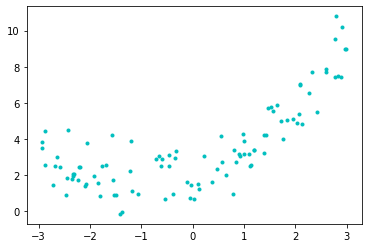

In [2]:
# Generate a data set
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, 'c.')

In [4]:
# Find the best linear fit of the data, and calculate the MSE.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_lr = LinearRegression()
model_lr.fit(X, y)
predictions_lr = model_lr.predict(X)
MSE_lr = mean_squared_error(y, predictions_lr)
print("MSE of the linear regression model:", MSE_lr)

# This MSE is calculated on the training set. It shouldn't be used to determine 
# the performance of this model on new data.

MSE of the linear regression model: 2.7320029815006586


## Polynomial Regression: Training Algorithm
The polynomial regression can actually be treated as multilinear regression with feature transformation in the following way:
1. Transform the original feature $X$ to a set of new features:
    - $Z_1 = X$
    - $Z_2 = X^2$
    - $Z_3 = X^3$
    - $\cdots$
    - $Z_d = X^d$
2. Then the model can be expressed as a multilinear model on $Z$'s:
$$Y \approx \theta_0 + \theta_1Z_1 + \theta_2Z_2 +\cdots + \theta_dZ_d$$.
3. Train the model as multilinear regression (use the normal equation or gradient descent)
    - To use the normal equation, the matrix $\textbf{X}$ and $\textbf{y}$ should be defined as
    $$\textbf{X} = \begin{pmatrix}
    1 & x^{(1)} & (x^{(1)})^2 & \cdots & (x^{(1)})^d \\
    1 & x^{(2)} & (x^{(2)})^2 & \cdots & (x^{(2)})^d \\
    \vdots & \vdots & \vdots &\ddots & \vdots \\
    1 & x^{(m)} & (x^{(m)})^2 & \cdots & (x^{(m)})^d \\
    \end{pmatrix}, \textbf{y} = \begin{pmatrix}
    y^{(1)}\\
    y^{(2)}\\
    \vdots\\
    y^{(m)}
    \end{pmatrix}$$

In [15]:
# Let's consider a polynomial model of degree 2.
# First, create data matrix X and y.
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_features.fit(X)
X_poly = poly_features.transform(X)

print(X_poly[:5])

[[-2.11865124e-02  4.48868308e-04]
 [ 2.08436240e+00  4.34456660e+00]
 [ 9.29548783e-01  8.64060939e-01]
 [-1.48940387e+00  2.21832389e+00]
 [-1.80368131e+00  3.25326626e+00]]


In [16]:
# Use sci-kit learn to train the polynomial model.
from sklearn.linear_model import LinearRegression
model_pr = LinearRegression()
model_pr.fit(X_poly, y)
print(model_pr.coef_, model_pr.intercept_)

[[0.94849451 0.47460992]] [1.96784537]


In [17]:
# Calculate the MSE of the degree-2 polynomial regression
predictions_pr = model_pr.predict(X_poly)
MSE_pr = mean_squared_error(y, predictions_pr)
print("MSE for degree-2 polynomial regression:", MSE_pr)


MSE for degree-2 polynomial regression: 1.010736702347847


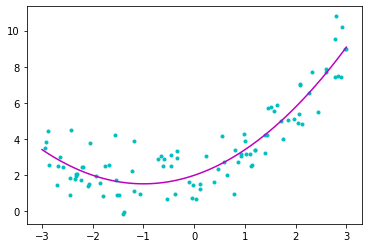

In [18]:
# Visualize the regression curve
plt.plot(X, y, 'c.') # Plot points from training data
x_coordinates = np.linspace(-3, 3, 100) # create a list of x in interval [-3, 3]
# Use the model to predict the corresponding y value
x_coordinates_poly = poly_features.transform(x_coordinates.reshape([-1, 1]))
y_coordinates = model_pr.predict(x_coordinates_poly)
# Plot the points
plt.plot(x_coordinates, y_coordinates, 'm-') 

In [ ]:
# Apply the normal equation to find the degree 2 polynomial fit of X and y



## Polynomial Regression: Overfitting
Polynomial regression with greater $d$ tends to fit the training data better. However, the performance may not carry to new data.
<img src="https://docs.aws.amazon.com/machine-learning/latest/dg/images/mlconcepts_image5.png" width="600">
<img src="https://miro.medium.com/fit/c/1838/551/0*Wup-0b5KI6-8cJB4.jpg" width="600">

In [ ]:
# Train a degree 20 polynomial to fit X and y
poly_features = PolynomialFeatures(degree=20, include_bias=False)
# poly_features.fit(X)
# X_poly = poly_features.transform(X)
X_poly = poly_features.fit_transform(X)

model_pr = LinearRegression()
model_pr.fit(X_poly, y)
predictions = model_pr.predict(X_poly)
mse = mean_squared_error(y, predictions)
print("MSE:", mse)

In [ ]:
plt.plot(X, y, 'c.')
x_coordinates = np.linspace(-3, 3.05, 100)
x_coordinates_poly = poly_features.transform(x_coordinates.reshape([-1, 1]))
y_coordinates = model_pr.predict(x_coordinates_poly)
plt.plot(x_coordinates, y_coordinates, 'm-')
# plt.ylim(0, 10)

## Identify Overfitting:
1. Train-test split
2. Learning curve
3. Cross validation
4. Visualization 